In [1]:
import numpy as np          
import argparse
import pandas as pd
#from termcolor import colored
import sys
sys.path.insert(1, './src/')
from scotv1 import *

/Users/yijwang-admin/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1 Read in data

In [2]:
# Blood ROSMAP
ROSMAPFrame = pd.read_csv("../../../Data/ROSMAP_blood_gene_expression_monocyte_ACTL_04172023.csv",header=0, index_col=0)
ROSMAPSampleID = list(ROSMAPFrame.columns.values)
ROSMAPGeneID = list(ROSMAPFrame.index.values)

# Blood ANMerge
ANMergeFrame = pd.read_csv("../../../Data/ANMerge_blood_rna_gene_expr_processed_XH_10112023.csv",header=0, index_col=0)
ANMergeGeneID = list(ANMergeFrame.index.values)
ANMergeSampleID = list(ANMergeFrame.columns.values)

In [3]:
# log transform ROSMAP
#ROSMAPFrame = np.log(ROSMAPFrame+1)

In [4]:
# log transform ROSMAP
ROSMAPFrame = np.log(ROSMAPFrame+1)

# gene overlap between ROSMAP and ANMerge
OverlapGene = list(set(ROSMAPGeneID) & set(ANMergeGeneID))
print("Number of overlapped gene is", len(OverlapGene))

Number of overlapped gene is 2785


## 1.1 Aligned dataframe to make their gene aligned

In [5]:
ROSMAPFrame = ROSMAPFrame.loc[OverlapGene,:]
ANMergeFrame = ANMergeFrame.loc[OverlapGene,:]

In [6]:
ROSMAPFrame

,Sample_003,Sample_004,Sample_014,Sample_021,Sample_031,Sample_037,Sample_040,Sample_050,Sample_057,Sample_058,...,Sample_563,Sample_572,Sample_573,Sample_578,Sample_580,Sample_581,Sample_582,Sample_588,Sample_590,Sample_608
PDCD4,6.126869,6.608001,1.386294,6.520621,6.492240,5.799093,5.902633,6.670766,6.126869,5.560682,...,5.843544,5.683580,5.638355,6.089045,6.562444,5.093750,1.504077,0.693147,6.001415,5.874931
TAPBP,7.891705,7.834392,10.776850,8.200563,8.030735,7.539559,7.586296,7.773594,8.112827,7.736744,...,7.266827,7.681560,7.427144,7.544332,7.608374,6.536692,9.757855,2.079442,7.766417,7.797291
SH2D3C,6.095825,5.921578,8.073403,6.068426,6.502790,5.877736,5.509388,5.978886,3.850148,5.455321,...,5.252273,5.568345,5.886104,5.869297,5.459586,4.204693,4.624973,0.000000,5.762051,5.433722
ADAT1,4.304065,3.713572,4.406719,4.532599,4.110874,4.189655,4.382027,3.178054,3.091042,3.555348,...,2.197225,3.784190,4.442651,3.583519,2.397895,1.609438,3.828641,0.000000,4.290459,4.304065
SERINC3,6.447306,5.981414,7.344073,7.092574,6.167516,6.761573,6.648985,6.008813,5.631212,6.222576,...,5.111988,6.338594,5.929589,6.437752,5.849325,4.499810,3.817712,1.098612,6.519147,6.614726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RRAS,3.828641,1.945910,2.397895,3.332205,3.295837,3.850148,3.295837,2.197225,3.218876,2.708050,...,3.135494,3.496508,3.891820,3.295837,2.772589,2.484907,0.693147,0.000000,3.761200,3.784190
NDUFAF3,5.420535,4.204693,6.440947,5.147494,5.164786,5.030438,4.605170,4.867534,4.219508,5.093750,...,4.219508,5.164786,5.451038,4.828314,3.401197,4.174387,1.871802,0.000000,5.023881,5.105945
NUDT5,4.897840,3.850148,5.693732,5.288267,4.605170,4.859812,4.997212,4.262680,3.931826,4.927254,...,3.663562,4.248495,4.997212,4.859812,3.951244,3.496508,1.386294,0.000000,4.644391,4.875197
B3GALT4,3.871201,3.688879,5.710427,4.094345,3.178054,3.850148,3.610918,1.386294,2.302585,3.044522,...,2.772589,3.806662,3.931826,3.663562,2.639057,1.609438,0.693147,0.000000,3.583519,3.850148


In [7]:
ANMergeFrame

,DCR00001_1,DCR00004_1,DCR00009_1,DCR00013_1,DCR00014_1,DCR00015_1,DCR00018_1,DCR00020_1,DCR00021_1,DCR00025_1,...,TLSMCI602_1,TLSMCI603_1,TLSMCI604_1,TLSMCI605_1,TLSMCI606_1,TLSMCI607_1,TLSMCI608_1,TLSMCI609_1,TLSMCI611_1,TLSMCI612_1
PDCD4,9.666724,9.489170,9.456045,9.719077,9.707032,9.501511,9.669455,9.900310,9.873016,10.037292,...,10.806184,10.917969,10.981394,10.797741,10.540448,11.422199,10.638308,9.909283,10.028400,10.809318
TAPBP,9.802898,9.585494,9.788007,10.186495,9.988576,9.484389,9.321027,9.885931,9.452979,10.097645,...,12.296335,12.311713,12.164747,12.247327,12.039702,11.675367,12.225795,9.536540,9.997186,12.218359
SH2D3C,8.155350,8.112471,8.186673,8.294352,8.264717,8.321705,8.315589,8.091578,8.485724,8.394500,...,10.857382,11.275413,10.854380,10.755587,10.729418,10.533654,11.036596,8.185351,8.575757,11.097175
ADAT1,6.983868,6.723652,7.025120,6.904492,7.231316,6.275629,6.530243,6.666324,6.704142,7.225351,...,8.701606,8.877474,8.692814,8.954537,8.791807,8.336717,8.708600,6.547596,7.082892,8.429439
SERINC3,8.777196,8.508892,8.225063,8.591892,8.857465,8.452497,8.278887,8.471589,8.473399,8.341000,...,10.688867,10.477657,10.242423,10.508763,9.928667,10.182840,10.605249,8.231788,8.736326,10.743378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RRAS,6.735914,7.007327,6.653804,6.675457,6.656387,6.759820,7.185844,7.001453,6.623266,6.346754,...,8.934505,8.826179,8.997185,9.279064,9.261760,8.877437,8.235489,6.531499,6.778742,9.038030
NDUFAF3,9.925172,9.416198,9.648668,9.767938,10.020697,9.758066,10.033777,9.920710,9.970285,9.391729,...,11.230427,11.332477,11.116741,11.260328,11.410548,11.321582,10.993751,9.974317,10.043242,11.289128
NUDT5,7.435803,7.375122,7.929059,7.544095,7.411956,7.554349,7.830068,7.444933,7.756725,7.242004,...,8.863005,9.227862,9.111104,8.921706,8.918222,8.587799,9.144412,7.561625,7.469832,8.575904
B3GALT4,7.027055,5.953712,6.256543,6.696325,6.617007,6.352697,6.210020,6.370031,6.244541,6.460623,...,8.303973,8.225434,8.015621,8.369483,8.769124,8.255490,8.727461,5.917983,6.432554,8.855276


## 1.2 Read in labels

In [8]:
# read in label
ROSMAP_Info = pd.read_csv("../../../Data/ROSMAP_blood_clinical_monocyte_ACTL_04172023.csv",header=0, index_col=0)

# read in label
ANMerge_Info = pd.read_csv("../../../Data/ANMerge_blood_rna_clinical_processed_XH_10112023.csv",header=0, index_col=0)
    

In [9]:
ANMerge_Info

,Visit,Month,Site,Diagnosis,Sex,Age,APOE,MMSE,Gexp_batch
DCR00001_1,1,0,DCR,AD,Female,80.0,E3E4,21.0,2
DCR00004_1,1,0,DCR,MCI,Male,78.0,E4E4,27.0,2
DCR00009_1,1,0,DCR,CTL,Female,69.0,E3E3,30.0,2
DCR00013_1,1,0,DCR,CTL,Male,82.0,E3E3,30.0,2
DCR00014_1,1,0,DCR,CTL,Female,75.0,E2E3,30.0,2
...,...,...,...,...,...,...,...,...,...
TLSMCI607_1,1,0,Toulouse,MCI,Female,72.0,E3E3,29.0,1
TLSMCI608_1,1,0,Toulouse,MCI,Male,73.0,E3E3,28.0,1
TLSMCI609_1,1,0,Toulouse,MCI,Female,63.0,E3E3,28.0,2
TLSMCI611_1,1,0,Toulouse,MCI,Female,78.0,E3E3,30.0,2


In [10]:
import collections

ROSMAP_SID = list(ROSMAP_Info.loc[:,'specimenID'])
ROSMAP_Class = list(ROSMAP_Info.loc[:,'Group2'])
Mapping = {'Control': 0, 'Typical.AD': 1, 'Asym.AD': 2, 'LowNFT.AD': 3}
DigitClass = list()
for i in range(len(ROSMAP_SID)):
    tmp = Mapping[ROSMAP_Class[i]]
    DigitClass.append(tmp)


ANMerge_SID = list(ANMerge_Info.index.values)
ANMerge_Class = list(ANMerge_Info.loc[:,'Diagnosis'])
ANMerge_Batch = list(ANMerge_Info.loc[:,'Gexp_batch'])
Mapping = {'CTL': 0, 'AD': 1, 'MCI': 2}
Mapping_SID_Class = {}
Mapping_SID_Batch = {}
Batch1_SID = list()
Batch2_SID = list()
for i in range(len(ANMerge_SID)):
    Mapping_SID_Class[ANMerge_SID[i]] = ANMerge_Class[i]
    Mapping_SID_Batch[ANMerge_SID[i]] = ANMerge_Batch[i]
    if ANMerge_Batch[i] == 1:
        Batch1_SID.append(ANMerge_SID[i])
    else:
        Batch2_SID.append(ANMerge_SID[i])

# used in section 3.1
y_true = np.zeros(len(ANMergeSampleID))
for i in range(len(ANMergeSampleID)):
    y_true[i] = Mapping[Mapping_SID_Class[ANMergeSampleID[i]]]


In [11]:
y_true

array([1., 2., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 2., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 2.,
       0., 0., 0., 1., 0., 0., 0., 1., 2., 1., 0., 0., 0., 1., 1., 2., 1.,
       0., 0., 0., 0., 1., 0., 1., 2., 0., 1., 0., 2., 0., 2., 0., 0., 0.,
       0., 0., 2., 1., 0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 2., 1., 0., 2., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

# 2. Run SCOT on ROSMAP and ANMerge Batch 1

In [12]:
ANMergeFrame_B1 = ANMergeFrame.loc[:, Batch1_SID]

In [13]:
ROSMAP_T = ROSMAPFrame.values.T
ANMerge_T = ANMergeFrame_B1.values.T

In [14]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=25)
pca.fit(ROSMAP_T)
print(np.sum(pca.explained_variance_ratio_))
ROSMAP_PCA = pca.fit_transform(ROSMAP_T)
print(np.shape(ROSMAP_PCA))

pca = PCA(n_components=50)
pca.fit(ANMerge_T)
print(np.sum(pca.explained_variance_ratio_))
ANMerge_PCA = pca.fit_transform(ANMerge_T)
print(np.shape(ANMerge_PCA))

0.9043623335318404
(157, 25)
0.8327727155961041
(341, 50)


In [15]:
ROSMAP = ROSMAP_T#ROSMAP_PCA#ROSMAPFrame.values.T
ANMerge = ANMerge_T#ANMerge_PCA#ANMergeFrame.values.T

IndR = np.tile(np.arange(157), 5)
ROSMAP = ROSMAP[IndR[0:len(Batch1_SID)],:]

In [16]:
np.shape(ROSMAP), np.shape(ANMerge)

((341, 2785), (341, 2785))

In [17]:
scot=SCOT(ROSMAP, ANMerge)

In [18]:
ROSMAP_new, ANMerge_new = scot.align(k=40, e=1e-3,  normalize=True, norm="l2")

It.  |Err         
-------------------
    0|5.193770e-03|


/Users/yijwang-admin/anaconda3/lib/python3.10/site-packages/ot/bregman.py:535: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|1.618000e-03|
   20|4.517897e-04|
   30|3.121806e-04|
   40|1.886289e-04|
   50|1.122483e-04|
   60|1.057358e-04|
   70|1.385888e-04|
   80|2.122379e-04|
   90|3.696052e-04|
  100|2.680669e-04|
  110|3.534816e-04|
  120|7.959675e-04|
  130|3.633704e-04|
  140|8.065419e-05|
  150|1.705833e-05|
  160|5.344734e-06|
  170|2.321736e-06|
  180|1.093406e-06|
  190|5.207142e-07|
It.  |Err         
-------------------
  200|2.482390e-07|
  210|1.183340e-07|
  220|5.640341e-08|
  230|2.688311e-08|
  240|1.281280e-08|
  250|6.106668e-09|
  260|2.910467e-09|
  270|1.387139e-09|
  280|6.611142e-10|


In [19]:
ROSMAP_new_ = ROSMAP_new[0:157,:]

## 2.1 UMAP

In [20]:
import umap
import sklearn.datasets
import umap.plot

In [21]:
# Umap need a matrix obs by features
Embed_Stack = np.vstack((ROSMAP_new_,ANMerge_new))

# label
N_K1 = np.shape(ROSMAP_new_)[0]
Label = np.zeros(np.shape(Embed_Stack)[0])
Label[N_K1:] = 4
Label[0:N_K1] = DigitClass

mapper = umap.UMAP().fit(Embed_Stack)

<Axes: >

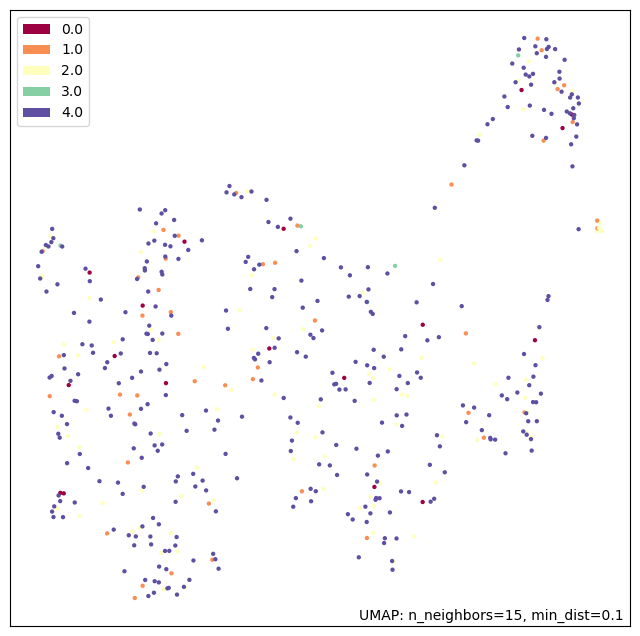

In [22]:
umap.plot.points(mapper, labels=Label)

## 2.2 KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

ROSMAP_new_ = ROSMAP_new[0:157,:]
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(ROSMAP_new_,DigitClass)

KNeighborsClassifier(n_neighbors=1)

In [24]:
ANMergeSampleID_B1 = list(ANMergeFrame_B1.columns)

y_pred = np.zeros(len(ANMergeSampleID_B1))
y_pred = -1+y_pred

Mapping_SID_PID_B1 = {}
for i in range(len(ANMergeSampleID_B1)):
    y_pred[i] = neigh.predict([ANMerge_new[i,:]])
    Mapping_SID_PID_B1[ANMergeSampleID_B1[i]] = y_pred[i]
    

# 3. Run SCOT on ROSMAP and ANMerge Batch 2

In [25]:
ANMergeFrame_B2 = ANMergeFrame.loc[:, Batch2_SID]

In [26]:
ROSMAP_T = ROSMAPFrame.values.T
ANMerge_T = ANMergeFrame_B2.values.T

In [27]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=25)
pca.fit(ROSMAP_T)
print(np.sum(pca.explained_variance_ratio_))
ROSMAP_PCA = pca.fit_transform(ROSMAP_T)
print(np.shape(ROSMAP_PCA))

pca = PCA(n_components=50)
pca.fit(ANMerge_T)
print(np.sum(pca.explained_variance_ratio_))
ANMerge_PCA = pca.fit_transform(ANMerge_T)
print(np.shape(ANMerge_PCA))

0.9043709078705724
(157, 25)
0.7999018634544027
(350, 50)


In [28]:
ROSMAP = ROSMAP_T#ROSMAP_PCA#ROSMAPFrame.values.T
ANMerge = ANMerge_T#ANMerge_PCA#ANMergeFrame.values.T

IndR = np.tile(np.arange(157), 5)
ROSMAP = ROSMAP[IndR[0:len(Batch2_SID)],:]

In [29]:
np.shape(ROSMAP), np.shape(ANMerge)

((350, 2785), (350, 2785))

In [30]:
scot=SCOT(ROSMAP, ANMerge)

In [31]:
ROSMAP_new, ANMerge_new = scot.align(k=40, e=1e-3,  normalize=True, norm="l2")

/Users/yijwang-admin/anaconda3/lib/python3.10/site-packages/ot/bregman.py:535: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


It.  |Err         
-------------------
    0|5.151348e-03|
   10|1.809740e-03|
   20|6.071304e-04|
   30|1.813281e-04|
   40|9.373849e-05|
   50|4.662953e-05|
   60|2.407086e-05|
   70|1.238547e-05|
   80|6.334534e-06|
   90|3.232035e-06|
  100|1.647235e-06|
  110|8.389473e-07|
  120|4.270815e-07|
  130|2.173467e-07|
  140|1.105886e-07|
  150|5.626197e-08|
  160|2.862115e-08|
  170|1.455926e-08|
  180|7.405918e-09|
  190|3.767131e-09|
It.  |Err         
-------------------
  200|1.916185e-09|
  210|9.746769e-10|


In [32]:
ROSMAP_new_ = ROSMAP_new[0:157,:]

## 3.1 UMAP

In [33]:
import umap
import sklearn.datasets
import umap.plot

In [34]:
# Umap need a matrix obs by features
Embed_Stack = np.vstack((ROSMAP_new_,ANMerge_new))

# label
N_K1 = np.shape(ROSMAP_new_)[0]
Label = np.zeros(np.shape(Embed_Stack)[0])
Label[N_K1:] = 4
Label[0:N_K1] = DigitClass

mapper = umap.UMAP().fit(Embed_Stack)

<Axes: >

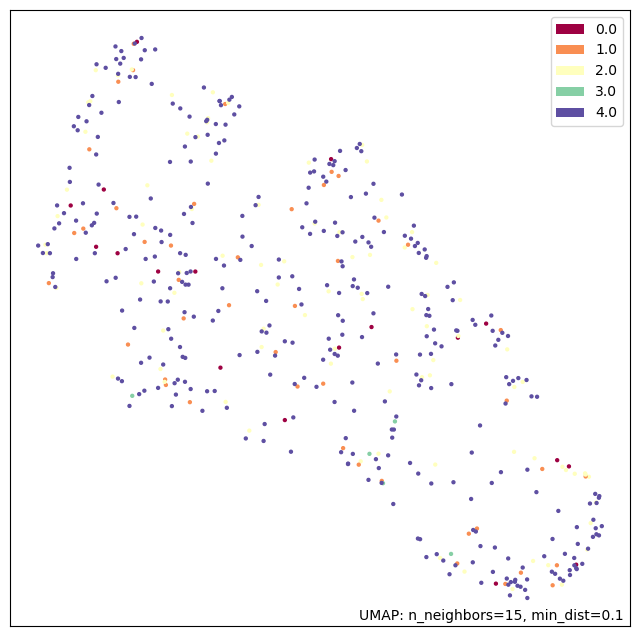

In [35]:
umap.plot.points(mapper, labels=Label)

## 3.2 KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

ROSMAP_new_ = ROSMAP_new[0:157,:]
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(ROSMAP_new_,DigitClass)

KNeighborsClassifier(n_neighbors=1)

In [37]:
ANMergeSampleID_B2 = list(ANMergeFrame_B2.columns)

y_pred = np.zeros(len(ANMergeSampleID_B2))
y_pred = -1+y_pred

Mapping_SID_PID_B2 = {}
for i in range(len(ANMergeSampleID_B2)):
    y_pred[i] = neigh.predict([ANMerge_new[i,:]])
    Mapping_SID_PID_B2[ANMergeSampleID_B2[i]] = y_pred[i]
    

# 4. Combine result

In [38]:
y_pred = np.zeros(len(ANMergeSampleID))
y_pred = -1+y_pred

for i in range(len(ANMergeSampleID)):
    if ANMergeSampleID[i] in Mapping_SID_PID_B1.keys():
        y_pred[i] = Mapping_SID_PID_B1[ANMergeSampleID[i]]
        
    if ANMergeSampleID[i] in Mapping_SID_PID_B2.keys():
        y_pred[i] = Mapping_SID_PID_B2[ANMergeSampleID[i]]


In [39]:
y_pred

array([3., 1., 2., 2., 0., 2., 2., 2., 2., 2., 0., 0., 3., 2., 2., 2., 0.,
       2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 1., 2., 0., 2., 2., 2., 2., 1., 0., 1., 2., 1., 2.,
       1., 0., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2.,
       1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 0., 2., 2., 1.,
       2., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2.,
       2., 1., 2., 0., 2., 0., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 3.,
       3., 1., 2., 2., 1., 1., 0., 2., 1., 2., 2., 2., 1., 1., 2., 3., 3.,
       2., 2., 2., 0., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1.,
       2., 3., 1., 2., 1., 1., 0., 0., 0., 1., 2., 2., 2., 1., 0., 2., 1.,
       2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1.,
       1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 0., 0., 2., 2., 2., 2.,
       2., 1., 1., 1., 2., 1., 1., 2., 0., 2., 1., 2., 2., 1., 2., 0., 2.,
       2., 2., 1., 2., 0.

# 5. Evaluation

In [40]:
#Mapping = {'Control': 0, 'Typical.AD': 1, 'Asym.AD': 2, 'LowNFT.AD': 3}
#Mapping = {'CTL': 0, 'AD': 1, 'MCI': 2}

#avg pre
Avg_Acc = 0
pred_ind_cn = np.where(y_pred==0)[0]
true_ind_cn = np.where(y_true==0)[0]
overlap = list(set(pred_ind_cn) & set(true_ind_cn))

pred_ind_aad = np.where(y_pred==2)[0]
true_ind_aad = np.where(y_true==2)[0]
overlap = list(set(pred_ind_aad) & set(true_ind_aad))

pred_ind_tad = np.where(y_pred==1)[0]
true_ind_tad = np.where(y_true==1)[0]
true_ind_tad_aad = list(true_ind_aad) + list(true_ind_tad)
overlap = list(set(pred_ind_tad) & set(true_ind_tad_aad))
print("precision of TAD is ", len(overlap)/len(pred_ind_tad))
Avg_Acc = Avg_Acc + len(overlap)/len(pred_ind_tad)

pred_ind_aad_cn = list(pred_ind_aad) #+ list(pred_ind_cn)
true_ind_aad_cn = list(true_ind_cn) + list(true_ind_aad)
overlap = list(set(pred_ind_aad_cn) & set(true_ind_aad_cn))
print("precision of AAD  is ", len(overlap)/len(pred_ind_aad_cn))
Avg_Acc = Avg_Acc + len(overlap)/len(pred_ind_aad_cn)

pred_ind_aad_cn = list(pred_ind_cn) #list(pred_ind_aad) + 
true_ind_aad_cn = list(true_ind_cn) + list(true_ind_aad)
overlap = list(set(pred_ind_aad_cn) & set(true_ind_aad_cn))
if len(pred_ind_aad_cn) == 0:
    print("precision of CN  is 0")
else:
    print("precision of CN  is ", len(overlap)/len(pred_ind_aad_cn))
    Avg_Acc = Avg_Acc + len(overlap)/len(pred_ind_aad_cn)

pred_ind_lt = np.where(y_pred==3)[0]
true_ind_lt = np.where(y_true==1)[0]
true_ind_lt_aad = list(true_ind_aad) + list(true_ind_lt)
overlap = list(set(pred_ind_lt) & set(true_ind_lt_aad))
if len(pred_ind_lt) == 0:
    print("precision of LowTau is 0")
else:
    print("precision of LowTau is ", len(overlap)/len(pred_ind_lt))
    Avg_Acc = Avg_Acc + len(overlap)/len(pred_ind_lt)
    
print("Avg Acc is ", Avg_Acc/4.)

precision of TAD is  0.6329787234042553
precision of AAD  is  0.6798029556650246
precision of CN  is  0.7625
precision of LowTau is  0.8235294117647058
Avg Acc is  0.7247027727084965


In [41]:
# output Mapping
ReverseMapping = {0:'Control', 1:'Typical AD', 2: 'Asym AD', 3: 'Low-NFT AD'}
ADNI_SID = ANMergeFrame.columns.values
print(len(ADNI_SID))
fname ="./ANMerge_2Batch_Transfered_Label_overlap_log.csv"
fh = open(fname, 'w')
fh.write("Sample_ID,Label\n")
for i in range(len(ADNI_SID)):
    fh.write("%s,%s\n" % (ADNI_SID[i], ReverseMapping[y_pred[i]]))
fh.close()

691


In [42]:
3

3